# HH vs MM - Comparing the activity of the native states

Here we only compare the HH and MM conditions to obtain conserved active and species-specific regions. We also generate figures depicting these calls. 

## Make new HH-vs-MM section in config.ini

In [2]:
#function
append_section_to_ini <- function(ini_file, new_section) {
    if (is.list(new_section)) {
        ini <- ini::read.ini(ini_file)
        ini <- c(ini,new_section)
        ini::write.ini(x=ini, filepath=ini_file)
    } else {
        print('new_section is not a list')
    }
}

#list of key-value pairs
`HH-VS-MM` <- list(dir='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_regions', 
               conserved_active='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_regions/conserved_active.regions.bed', 
               `hh-active_mm-inactive`='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_regions/HH-active_MM-inactive.regions.bed', 
               `mm-active_hh-inactive`='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_regions/MM-active_HH-inactive.regions.bed')

#list of section, resulting in list of list.
new_section <- list(`HH-VS-MM`=`HH-VS-MM`)

#write ini
append_section_to_ini("../config.ini", new_section)

## Obtain Conserved Active and Species Specific Regions

In [8]:
# bash kernel

#input
HH=$(read-ini ../config.ini ACTIVITY hh_active_regions)
MM=$(read-ini ../config.ini ACTIVITY mm_active_regions)

#output
CONS_ACT=$(read-ini ../config.ini HH-VS-MM conserved_active)
HH_specific=$(read-ini ../config.ini HH-VS-MM hh-active_mm-inactive)
MM_specific=$(read-ini ../config.ini HH-VS-MM mm-active_hh-inactive)

OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_regions'

In [9]:
#write the whole interval. I tested and this works properly. 

#write HH if overlap
bedtools intersect -u -F 0.5 -f 0.5 -e -a $HH -b $MM > tmp1.bed
#write MM if overlap
bedtools intersect -u -F 0.5 -f 0.5 -e -b $HH -a $MM > tmp2.bed

#merge
cat tmp1.bed tmp2.bed | sort -k1,1 -k2,2n - | bedtools merge -i - > $CONS_ACT

#remove tmp files
rm tmp1.bed tmp2.bed

In [10]:
#write HH regions that do not overlap
bedtools intersect -v -F 0.5 -f 0.5 -e -a $HH -b $MM > $HH_specific

#write MM regions that do not overlap
bedtools intersect -v -F 0.5 -f 0.5 -e -b $HH -a $MM > $MM_specific

In [11]:
#how many overlaps are there? 

#conserved active
wc -l $CONS_ACT

#hh-active_mm-inactive
wc -l $HH_specific

#mm-active_hh-inactive
wc -l $MM_specific

3034 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_regions/conserved_active.regions.bed
6922 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_regions/HH-active_MM-inactive.regions.bed
6941 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_regions/MM-active_HH-inactive.regions.bed


## ATAC-STARR Activity - Heatmaps

In [12]:
# bash kernel

#Paths
CONS_ACT=$(read-ini ../config.ini HH-VS-MM conserved_active)
HH_specific=$(read-ini ../config.ini HH-VS-MM hh-active_mm-inactive)
MM_specific=$(read-ini ../config.ini HH-VS-MM mm-active_hh-inactive)
HH_BW=$(read-ini ../config.ini ACTIVITY_BW hh_merged)
MM_BW=$(read-ini ../config.ini ACTIVITY_BW mm_merged)
PLOT_DIR=$(read-ini ../config.ini HH-VS-MM plots)

computeMatrix reference-point -S $HH_BW $MM_BW \
    -R $CONS_ACT $HH_specific $MM_specific \
    -a 1000 -b 1000 --referencePoint center --binSize 10 --missingDataAsZero -p 4 \
    -o ${PLOT_DIR}/matrix_HH-vs-MM_activity.gz


The following chromosome names did not match between the bigwig files
chromosome	length
chr6_GL000251v2_alt	   4795265
chr5_KI270792v1_alt	    179043
chr22_KI270928v1_alt	    176103
chrUn_KI270579v1	     31033
chrUn_KI270591v1	      5796
chrX_KI270881v1_alt	    144206
chr9_GL383539v1_alt	    162988
chr19_GL949753v2_alt	    796479
chrUn_KI270383v1	      1750
chrUn_KI270752v1	     27745
chr5_KI270795v1_alt	    131892
chr19_GL949748v2_alt	   1064304
chr22_KI270875v1_alt	    259914
chr2_GL383522v1_alt	    123821
chrUn_KI270304v1	      2165
chrUn_KI270302v1	      2274
chr22_KI270732v1_random	     41543
chrUn_KI270587v1	      2969
chr3_KI270924v1_alt	    166540
chr6_KI270801v1_alt	    870480
chr4_GL000257v2_alt	    586476
chrUn_KI270372v1	      1650
chr8_KI270812v1_alt	    282736
chrUn_KI270548v1	      1599
chr2_KI270716v1_random	    153799
chr18_KI270863v1_alt	    167999
chr12_GL877875v1_alt	    167313
chrUn_KI270312v1	       998
chrUn_KI270315v1	      2276
chrUn_KI270423v1	       981
chr2

chrUn_GL000216v2	    176608
chrUn_KI270382v1	      4215
chr11_KI270903v1_alt	    214625
chr9_KI270720v1_random	     39050
chr7_GL383534v2_alt	    119183
chrUn_KI270529v1	      1899
chrUn_GL000218v1	    161147
chr7_KI270804v1_alt	    157952
chr19_GL383573v1_alt	    385657
chr19_KI270914v1_alt	    205194
chrUn_KI270528v1	      2983
chr19_KI270929v1_alt	    186203
chr17_KI270858v1_alt	    235827
chr6_KI270798v1_alt	    271782
chr22_GL383583v2_alt	     96924
chr5_KI270796v1_alt	    172708
chr11_KI270927v1_alt	    218612
chr7_KI270806v1_alt	    158166
chr3_KI270781v1_alt	    113034
chr18_GL383567v1_alt	    289831
chr8_KI270813v1_alt	    300230
chr18_GL383572v1_alt	    159547
chr3_KI270935v1_alt	    197351
chr17_JH159148v1_alt	     88070
chrUn_KI270511v1	      8127
chr19_KI270865v1_alt	     52969
chr17_GL383563v3_alt	    375691
chr19_GL383574v1_alt	    155864
chr16_GL383557v1_alt	     89672
chr19_KI270916v1_alt	    184516
chr4_KI270785v1_alt	    119912
chrUn_KI270320v1	      4416
chrUn_KI270

In [13]:
#plot heatmap from matricies.
plotHeatmap -m ${PLOT_DIR}/matrix_HH-vs-MM_activity.gz \
    -o ${PLOT_DIR}/heatmap_HH-vs-MM_activity.pdf \
    --dpi 300 --plotFileFormat pdf --sortRegions no \
    --refPointLabel center \
    --regionsLabel "conserved active" "HH-specific active" "MM-specific active" \
    --colorMap RdBu \
    --zMin -0.5 \
    --zMax 0.5 \
    --samplesLabel "HH Activity" "MM Activity" \
    --heatmapHeight 8 --heatmapWidth 3 --whatToShow 'heatmap and colorbar'

## Region Count Proportions -  Donut plot

In [1]:
# r kernel
data <- data.frame(category = c("Conserved Active", "Human-Specific Active", "Rhesus-Specific Active"), 
                   count = c(3034, 6922, 6941))

In [2]:
#donut plot function
prep_data <- function(data){
    # Compute percentages
    data$fraction <- data$count / sum(data$count)
    # Compute the cumulative percentages (top of each rectangle)
    data$ymax <- cumsum(data$fraction)
    # Compute the bottom of each rectangle
    data$ymin <- c(0, head(data$ymax, n=-1))
    # Compute label position
    data$labelPosition <- (data$ymax + data$ymin) / 2
    # Compute a good label
    data$label <- paste0(data$category, "\n value: ", data$count)
return(data)
}

data <- prep_data(data)

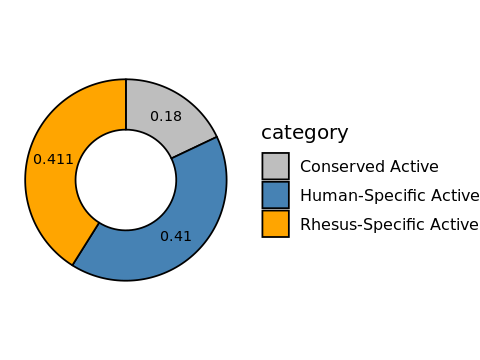

In [3]:
suppressPackageStartupMessages(library(ggplot2))

ini <- ini::read.ini("../config.ini")

# Make the plot
p <- ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) +
  geom_rect(color = "black") +
  geom_text(x=3.5, aes(y=labelPosition, label=round(fraction,3)), size=3) +
  scale_fill_manual(values = c("grey", "steelblue", "orange")) +
  coord_polar(theta="y") +
  xlim(c(2, 4)) +
  theme_void(base_size = 12)

options(repr.plot.height = 3, repr.plot.width = 4)
p

ggsave(plot = p, filename = paste0(ini$`HH-VS-MM`$plots, "/donut.pdf"), device = cairo_pdf, width = 4, height = 3)